In [17]:
import pandas as pd
import os
os.environ['PROJ_LIB'] = r'C:\Users\gargm\Anaconda3\pkgs\proj4-5.2.0-h6538335_1003\Library\share'

## for maps 
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
source = "data/tmax-3/"

In [19]:
df = pd.DataFrame()
for files in os.listdir(source):
    df_file = pd.read_csv(source+files,compression='gzip',header=None,sep=',',quotechar='"',error_bad_lines=False)
    df = pd.concat([df,df_file],ignore_index=True)
df.head()

,0,1,2,3,4,5
0,CA001017230,1980-02-06,48.6500,-123.6333,138.0,7.0
1,USC00365390,1986-03-12,39.8253,-75.4283,3.0,7.8
2,CA001017230,1980-02-19,48.6500,-123.6333,138.0,10.5
3,RSM00030405,1986-01-30,55.3830,101.0330,423.0,-19.8
4,RSM00030632,1980-02-24,53.8500,108.5800,458.0,-6.8


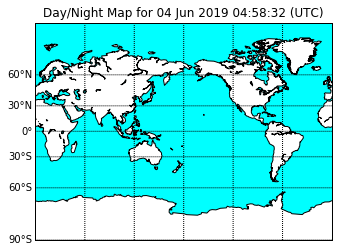

In [26]:
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60))
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
##CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()